In [1]:
import numpy as np
import math,struct,pickle
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
def tanh(x):
    return np.tanh(x)
def softmax(x):
    exp=np.exp(x-x.max())
    return exp/exp.sum()

In [3]:
dimensions=[28*28,10]
activation=[tanh,softmax]
distribution=[
    {'b':[0,0]},
    {'b':[0,0],'w':[-math.sqrt(6/(dimensions[0]+dimensions[1])),math.sqrt(6/(dimensions[0]+dimensions[1]))]},
]

In [4]:
def init_parameters_b(layer):
    dist=distribution[layer]['b']
    return np.random.rand(dimensions[layer])*(dist[1]-dist[0])+dist[0]
def init_parameters_w(layer):
    dist=distribution[layer]['w']
    return np.random.rand(dimensions[layer-1],dimensions[layer])*(dist[1]-dist[0])+dist[0]
def init_parameters():
    parameter=[]
    for i in range(len(distribution)):
        layer_parameter={}
        for j in distribution[i].keys():
            if j=='b':
                layer_parameter['b']=init_parameters_b(i)
                continue
            if j=='w':
                layer_parameter['w']=init_parameters_w(i)
                continue
        parameter.append(layer_parameter)
    return parameter

In [47]:
parameters=init_parameters()

In [6]:
def predict(img,parameters):
    l0_in=img+parameters[0]['b']
    l0_out=activation[0](l0_in)
    l1_in=np.dot(l0_out,parameters[1]['w'])+parameters[1]['b']
    l1_out=activation[1](l1_in)
    return l1_out

In [7]:
predict(np.random.rand(784),parameters).argmax()

5

In [8]:
test_img=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0703125, 0.0703125, 0.0703125, 0.4921875, 0.53125, 0.68359375, 0.1015625, 0.6484375, 0.99609375, 0.96484375, 0.49609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1171875, 0.140625, 0.3671875, 0.6015625, 0.6640625, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.87890625, 0.671875, 0.98828125, 0.9453125, 0.76171875, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19140625, 0.9296875, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98046875, 0.36328125, 0.3203125, 0.3203125, 0.21875, 0.15234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0703125, 0.85546875, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.7734375, 0.7109375, 0.96484375, 0.94140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3125, 0.609375, 0.41796875, 0.98828125, 0.98828125, 0.80078125, 0.04296875, 0.0, 0.16796875, 0.6015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0546875, 0.00390625, 0.6015625, 0.98828125, 0.3515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.54296875, 0.98828125, 0.7421875, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04296875, 0.7421875, 0.98828125, 0.2734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13671875, 0.94140625, 0.87890625, 0.625, 0.421875, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.31640625, 0.9375, 0.98828125, 0.98828125, 0.46484375, 0.09765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17578125, 0.7265625, 0.98828125, 0.98828125, 0.5859375, 0.10546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0625, 0.36328125, 0.984375, 0.98828125, 0.73046875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.97265625, 0.98828125, 0.97265625, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1796875, 0.5078125, 0.71484375, 0.98828125, 0.98828125, 0.80859375, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15234375, 0.578125, 0.89453125, 0.98828125, 0.98828125, 0.98828125, 0.9765625, 0.7109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09375, 0.4453125, 0.86328125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.78515625, 0.3046875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08984375, 0.2578125, 0.83203125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.7734375, 0.31640625, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0703125, 0.66796875, 0.85546875, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.76171875, 0.3125, 0.03515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21484375, 0.671875, 0.8828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.953125, 0.51953125, 0.04296875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.53125, 0.98828125, 0.98828125, 0.98828125, 0.828125, 0.52734375, 0.515625, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

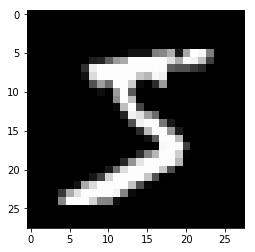

In [9]:
import matplotlib.pyplot as plt
im = np.reshape(test_img,(28,28))
plt.imshow(im , cmap='gray')

In [10]:
path='model_02.pkl'
with open(path,'rb') as f:
    parameters=pickle.load(f)

In [11]:
predict(np.array(test_img),parameters).argmax()

5

In [12]:
parameters

[{'b': array([-1.22268644e-02, -1.69337185e-02, -1.55384097e-02, -3.15686490e-02,
          1.10621898e-02,  5.53598326e-03, -6.35943805e-03, -5.84399455e-03,
          8.42867360e-03,  5.93783115e-03, -1.56796413e-02, -5.56046295e-03,
         -1.58257714e-02, -2.08147441e-02,  4.14084064e-03, -3.30956987e-03,
         -1.44388093e-02, -1.70634684e-02,  1.99394249e-04, -8.62252737e-03,
          2.74250602e-02, -1.00596961e-02, -3.61814817e-03,  2.21515384e-03,
          1.08541903e-02,  1.01123336e-02, -6.22160272e-03,  2.33535257e-02,
         -1.44424552e-02,  6.65463041e-03, -1.68420346e-02,  7.61633816e-04,
          4.15787745e-03,  5.26976593e-02,  1.05732735e-02, -7.68558429e-03,
         -3.49612494e-02,  5.01457301e-02, -2.15991903e-02,  2.41617243e-02,
          9.82514398e-03, -1.22803316e-03,  2.24658303e-02, -1.66578564e-02,
          1.14147401e-02, -2.75883366e-02,  1.08087783e-02,  2.57514564e-02,
         -2.37001587e-03,  4.03441970e-02, -1.53690019e-02,  3.20923099

In [13]:
dataset_path=Path('./MNIST')
train_img_path=dataset_path/'train-images.idx3-ubyte'
train_lab_path=dataset_path/'train-labels.idx1-ubyte'
test_img_path=dataset_path/'t10k-images.idx3-ubyte'
test_lab_path=dataset_path/'t10k-labels.idx1-ubyte'

In [45]:
train_num=50000
valid_num=10000
test_num=10000

with open(train_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    tmp_img=np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)/255
    train_img=tmp_img[:train_num]
    valid_img=tmp_img[train_num:]
    
with open(test_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    test_img=np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)/255

with open(train_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    tmp_lab=np.fromfile(f,dtype=np.uint8)
    train_lab=tmp_lab[:train_num]
    valid_lab=tmp_lab[train_num:]
    
with open(test_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    test_lab=np.fromfile(f,dtype=np.uint8)

In [15]:
def show_train(index):
    plt.imshow(train_img[index].reshape(28,28),cmap='gray')
    print('label : {}'.format(train_lab[index]))
def show_valid(index):
    plt.imshow(valid_img[index].reshape(28,28),cmap='gray')
    print('label : {}'.format(valid_lab[index]))
def show_test(index):
    plt.imshow(test_img[index].reshape(28,28),cmap='gray')
    print('label : {}'.format(test_lab[index]))

label : 3


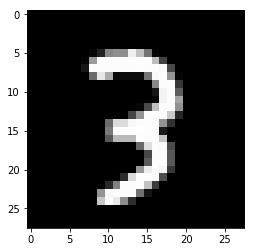

In [16]:
show_train(np.random.randint(train_num))

label : 2


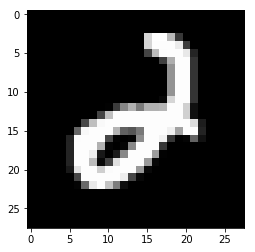

In [17]:
show_valid(np.random.randint(valid_num))

label : 6


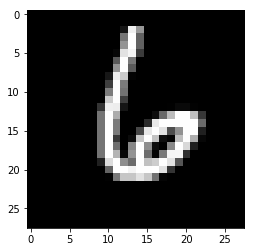

In [18]:
show_test(np.random.randint(test_num))

In [19]:
def d_softmax(data):
    sm=softmax(data)
    return np.diag(sm)-np.outer(sm,sm)

# def d_tanh(data):
#     return np.diag(1/(np.cosh(data))**2)
def d_tanh(data):
    return 1/(np.cosh(data))**2

differential={softmax:d_softmax,tanh:d_tanh}

In [20]:
d_tanh([1,2,3,4])

array([0.41997434, 0.07065082, 0.00986604, 0.00134095])

In [21]:
d_softmax(np.array([1,2,3,4]))

array([[ 0.03103085, -0.00279373, -0.00759413, -0.02064299],
       [-0.00279373,  0.07955019, -0.02064299, -0.05611347],
       [-0.00759413, -0.02064299,  0.18076935, -0.15253222],
       [-0.02064299, -0.05611347, -0.15253222,  0.22928869]])

In [22]:
h=0.0001
func=softmax
input_len=4
for i in range(input_len):
    test_input=np.random.rand(input_len)
    derivative=differential[func](test_input)
    value1=func(test_input)
    test_input[i]+=h
    value2=func(test_input)
#     print((value2-value1)/h)
#     print(derivative[i])
    print(derivative[i]-(value2-value1)/h)

[-4.73181237e-06  1.00658877e-06  1.95246895e-06  1.77275604e-06]
[ 2.20056632e-06 -4.73398460e-06  1.19438817e-06  1.33903151e-06]
[ 1.06526890e-06  1.15213585e-06 -3.20049125e-06  9.83086788e-07]
[ 1.71278433e-06  1.55024184e-06  1.20785061e-06 -4.47087678e-06]


In [23]:
h=0.000001
func=tanh
input_len=4
for i in range(input_len):
    test_input=np.random.rand(input_len)
    derivative=differential[func](test_input)
    value1=func(test_input)
    test_input[i]+=h
    value2=func(test_input)
#     print((value2-value1)/h)
#     print(derivative[i])
    print(derivative[i]-((value2-value1)/h)[i])

2.972907651166423e-07
3.6578738538128874e-07
1.1782731657028478e-07
3.4406706139744614e-07


In [24]:
onehot=np.identity(dimensions[-1])

def sqr_loss(img,lab,parameters):
    y_pred=predict(img,parameters)
    y=onehot[lab]
    diff=y-y_pred
    return np.dot(diff,diff)

In [25]:
sqr_loss(train_img[0],train_lab[0],parameters)

0.10263648423433012

In [26]:
def grad_parameters(img,lab,parameters):
    l0_in=img+parameters[0]['b']
    l0_out=activation[0](l0_in)
    l1_in=np.dot(l0_out,parameters[1]['w'])+parameters[1]['b']
    l1_out=activation[1](l1_in)
    
    diff=onehot[lab]-l1_out
    act1=np.dot(differential[activation[1]](l1_in),diff)
    
    grad_b1=-2*act1
    grad_w1=-2*np.outer(l0_out,act1)
    grad_b0=-2*differential[activation[0]](l0_in)*np.dot(parameters[1]['w'],act1)
    
    return {'w1':grad_w1,'b1':grad_b1,'b0':grad_b0}

In [27]:
grad_parameters(train_img[2],train_lab[2],init_parameters())

{'w1': array([[-0., -0., -0., ...,  0., -0., -0.],
        [-0., -0., -0., ...,  0., -0., -0.],
        [-0., -0., -0., ...,  0., -0., -0.],
        ...,
        [-0., -0., -0., ...,  0., -0., -0.],
        [-0., -0., -0., ...,  0., -0., -0.],
        [-0., -0., -0., ...,  0., -0., -0.]]),
 'b1': array([-0.01032757, -0.01100189, -0.00625271, -0.01436477, -0.04113696,
        -0.01429591, -0.01368695,  0.1332406 , -0.00883714, -0.0133367 ]),
 'b0': array([-5.98547213e-003,  1.08860687e-002,  8.80746548e-003,
        -7.09257601e-003, -9.36767912e-003, -7.92815278e-003,
        -1.43994727e-003, -4.92165675e-003, -8.98305274e-004,
        -1.81751739e-003, -1.94410104e-003,  1.08356455e-002,
         1.51099470e-003, -1.21007911e-003, -9.68122364e-003,
         1.25622739e-003,  7.69433354e-003,  8.32541700e-003,
         5.89558171e-003,  1.32192981e-002, -2.68537925e-003,
        -7.81582981e-004, -5.29590228e-003, -6.04824607e-003,
        -9.44469443e-003,  1.39601454e-004, -4.964573

In [28]:
# b1 
h=0.00001
for i in range(10):
    img_i=np.random.randint(train_num)
    test_parameters=init_parameters()
    derivative=grad_parameters(train_img[img_i],train_lab[img_i],test_parameters)['b1']
    value1=sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
    test_parameters[1]['b'][i]+=h
    value2=sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
    print(derivative[i]-(value2-value1)/h)

-1.32931432103231e-08
-2.409304682982061e-07
6.717242480025476e-07
1.9010109349182347e-07
-1.1090499531414555e-07
-4.4586077828367987e-07
-8.876067625340767e-08
-4.425811561204265e-09
-1.4665282977235905e-07
-2.5267951572066627e-07


In [29]:
# w1
grad_list=[]
h=0.0001
for i in range(784):
    for j in range(10):
        img_i=np.random.randint(train_num)
        test_parameters=init_parameters()
        derivative=grad_parameters(train_img[img_i],train_lab[img_i],test_parameters)['w1']
        value1=sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
        test_parameters[1]['w'][i][j]+=h
        value2=sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
        grad_list.append(derivative[i][j]-(value2-value1)/h)
np.abs(grad_list).max()

9.626917369220944e-06

In [30]:
# b0 
grad_list=[]
h=0.001
for i in range(784):
    img_i=np.random.randint(train_num)
    test_parameters=init_parameters()
    derivative=grad_parameters(train_img[img_i],train_lab[img_i],test_parameters)['b0']
    value1=sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
    test_parameters[0]['b'][i]+=h
    value2=sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
    grad_list.append(derivative[i]-(value2-value1)/h)
np.abs(grad_list).max()

1.187988961728198e-06

In [52]:
def valid_loss(parameters):
    loss_accu=0
    for img_i in range(valid_num):
        loss_accu+=sqr_loss(valid_img[img_i],valid_lab[img_i],parameters)
    return loss_accu/(valid_num/10000)
def valid_accuracy(parameters):
    correct=[predict(valid_img[img_i],parameters).argmax()==valid_lab[img_i] for img_i in range(valid_num)]
    return correct.count(True)/len(correct)
def train_loss(parameters):
    loss_accu=0
    for img_i in range(train_num):
        loss_accu+=sqr_loss(train_img[img_i],train_lab[img_i],parameters)
    return loss_accu/(train_num/10000)
def train_accuracy(parameters):
    correct=[predict(train_img[img_i],parameters).argmax()==train_lab[img_i] for img_i in range(train_num)]
    return correct.count(True)/len(correct)

In [32]:
valid_loss(parameters)

1503.6989970176978

In [33]:
valid_accuracy(init_parameters())

validation accuracy : 0.1438


In [34]:
batch_size=100
def train_batch(current_batch,parameters):
    grad_accu=grad_parameters(train_img[current_batch*batch_size+0],train_lab[current_batch*batch_size+0],parameters)
    for img_i in range(1,batch_size):
        grad_tmp=grad_parameters(train_img[current_batch*batch_size+img_i],train_lab[current_batch*batch_size+img_i],parameters)
        for key in grad_accu.keys():
            grad_accu[key]+=grad_tmp[key]
    for key in grad_accu.keys():
        grad_accu[key]/=batch_size
    return grad_accu

In [35]:
train_batch(0,parameters)

{'w1': array([[ 1.03347004e-05, -6.25449278e-05, -1.76394549e-05, ...,
          2.13970188e-05, -1.12676075e-04, -6.77088021e-06],
        [ 1.43124922e-05, -8.66182629e-05, -2.44288226e-05, ...,
          2.96326603e-05, -1.56044722e-04, -9.37696954e-06],
        [ 1.31333662e-05, -7.94822695e-05, -2.24162688e-05, ...,
          2.71913915e-05, -1.43189071e-04, -8.60445355e-06],
        ...,
        [ 2.11910490e-05, -1.28246837e-04, -3.61692687e-05, ...,
          4.38740610e-05, -2.31039521e-04, -1.38835234e-05],
        [-2.43382458e-05,  1.47293465e-04,  4.15409616e-05, ...,
         -5.03900342e-05,  2.65352444e-04,  1.59454403e-05],
        [ 1.86281043e-06, -1.12736064e-05, -3.17947880e-06, ...,
          3.85677266e-06, -2.03096519e-05, -1.22043851e-06]]),
 'b1': array([-8.45287478e-04,  5.11562430e-03,  1.44275208e-03,  1.38193281e-03,
        -4.61754164e-03, -1.05960103e-02,  9.89089639e-05, -1.75008771e-03,
         9.21591063e-03,  5.53798374e-04]),
 'b0': array([-2.4937

In [36]:
import copy
def combine_parameters(parameters,grad,learn_rate):
    parameter_tmp=copy.deepcopy(parameters)
    parameter_tmp[0]['b']-=learn_rate*grad['b0']
    parameter_tmp[1]['b']-=learn_rate*grad['b1']
    parameter_tmp[1]['w']-=learn_rate*grad['w1']
    return parameter_tmp

In [37]:
combine_parameters(parameters,train_batch(0,parameters),1)

[{'b': array([-1.19774858e-02, -1.70124813e-02, -1.57611586e-02, -3.29941234e-02,
          1.13402431e-02,  5.23436111e-03, -5.32733333e-03, -6.14615223e-03,
          8.95087370e-03,  5.35958704e-03, -1.53389555e-02, -4.89839456e-03,
         -1.51477001e-02, -2.06311786e-02,  4.70025465e-03, -4.12987595e-03,
         -1.47431339e-02, -1.69919474e-02,  1.11322471e-04, -1.03625183e-02,
          2.76990144e-02, -1.01368938e-02, -4.62622831e-03,  2.90607800e-03,
          1.18790992e-02,  9.03605805e-03, -5.97092420e-03,  2.39107428e-02,
         -1.49626018e-02,  5.83429690e-03, -1.79237298e-02,  9.55651116e-04,
          3.72125548e-03,  5.31810900e-02,  1.03135669e-02, -7.22807104e-03,
         -3.60362974e-02,  5.00815319e-02, -2.22295179e-02,  2.42837191e-02,
          8.72222244e-03, -3.89814042e-04,  2.20827764e-02, -1.75728213e-02,
          1.09229021e-02, -2.77683812e-02,  1.09316453e-02,  2.68270788e-02,
         -1.78873303e-03,  4.05256266e-02, -1.55993063e-02,  3.15848391

In [59]:
parameters=init_parameters()
current_epoch=0
train_loss_list=[]
valid_loss_list=[]
train_accu_list=[]
valid_accu_list=[]

In [49]:
valid_accuracy(parameters)

validation accuracy : 0.0935


In [57]:
from tqdm import tqdm_notebook

In [89]:
learn_rate=10**-0.6
epoch_num=10
for epoch in tqdm_notebook(range(epoch_num)):
    for i in range(train_num//batch_size):
#         if i%100==99:
#             print('running batch {}/{}'.format(i+1,train_num//batch_size))
        grad_tmp=train_batch(i,parameters)
        parameters=combine_parameters(parameters,grad_tmp,learn_rate)
    current_epoch+=1
    train_loss_list.append(train_loss(parameters))
    train_accu_list.append(train_accuracy(parameters))
    valid_loss_list.append(valid_loss(parameters))
    valid_accu_list.append(valid_accuracy(parameters))

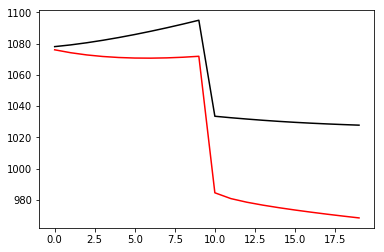

In [90]:
lower=-20
plt.plot(valid_loss_list[lower:], color='black', label='validation loss')
plt.plot(train_loss_list[lower:], color='red', label='train loss')
plt.show()

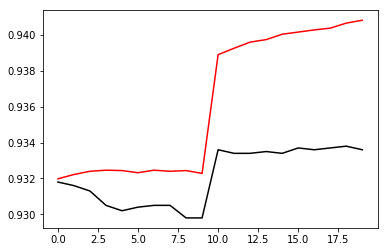

In [91]:
plt.plot(valid_accu_list[lower:], color='black', label='validation accuracy')
plt.plot(train_accu_list[lower:], color='red', label='train accuracy')
plt.show()

In [74]:
rand_batch=np.random.randint(train_num//batch_size)
grad_lr=train_batch(rand_batch,parameters)

In [95]:
lr_list=[]
lower=-2.75
upper=-0.75
step=0.1
for lr_pow in tqdm_notebook(np.linspace(lower,upper,num=(upper-lower)//step+1)):
    learn_rate=10**lr_pow
    parameters_tmp=combine_parameters(parameters,grad_lr,learn_rate)
    train_loss_tmp=train_loss(parameters_tmp)
    lr_list.append([lr_pow,train_loss_tmp])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


In [83]:
lr_list

[[-2.0, 1071.0215374352226],
 [-1.8947368421052633, 1070.786844251847],
 [-1.7894736842105263, 1070.4901468441062],
 [-1.6842105263157894, 1070.115911661122],
 [-1.5789473684210527, 1069.6452597476195],
 [-1.473684210526316, 1069.0556162389337],
 [-1.368421052631579, 1068.3206135371859],
 [-1.263157894736842, 1067.4105319461148],
 [-1.1578947368421053, 1066.2937689759572],
 [-1.0526315789473686, 1064.9401698902805],
 [-0.9473684210526316, 1063.3276088929422],
 [-0.8421052631578947, 1061.454112527371],
 [-0.736842105263158, 1059.3592726169363],
 [-0.6315789473684212, 1057.1610460832171],
 [-0.5263157894736843, 1055.117864794632],
 [-0.42105263157894735, 1053.7323452520732],
 [-0.3157894736842106, 1053.923921545092],
 [-0.2105263157894739, 1057.3179502805692],
 [-0.10526315789473695, 1066.7377260820094],
 [0.0, 1087.0599696072613]]

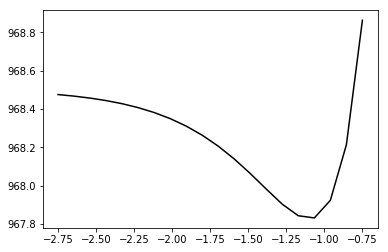

In [96]:
upper=len(lr_list)
plt.plot(np.array(lr_list)[:upper,0],np.array(lr_list)[:upper,1], color='black')
plt.show()